In [2]:
pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
    --------------------------------------- 0.0/1.4 MB 1.3 MB/s eta 0:00:02
   -- ------------------------------------- 0.1/1.4 MB 1.1 MB/s eta 0:00:02
   ------ --------------------------------- 0.2/1.4 MB 1.7 MB/s eta 0:00:01
   ---------- ----------------------------- 0.4/1.4 MB 2.1 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.4 MB 2.6 MB/s eta 0:00:01
   ------------------------ --------------- 0.9/1.4 MB 3.3 MB/s eta 0:00:01
   --------------------------------- ------ 1.2/1.4 MB 3.7 MB/s eta 0:00:01
   ---------------------------------------  1.4/1.4 MB 4.0 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 3.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [80]:
df = pd.read_csv("Social_Network_ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [9]:
df.shape

(400, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [12]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

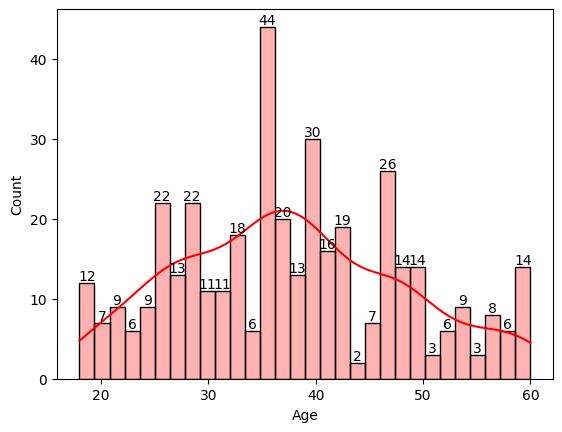

In [28]:
histplot = sns.histplot(df['Age'], kde=True, bins=30, color='red', alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i)
plt.show()

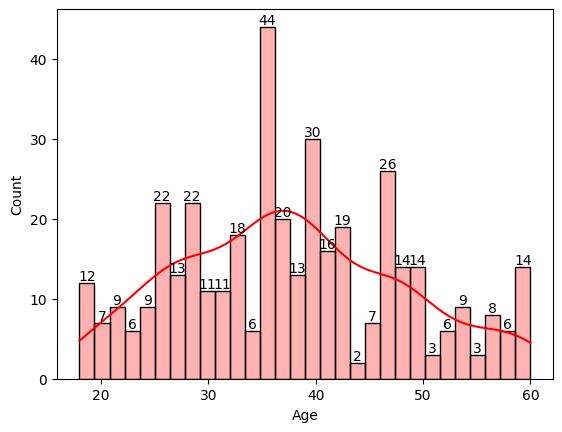

In [40]:
histplot = sns.histplot(df['Age'],kde=True, bins=30, color="red", alpha=0.3)
for i in histplot.containers:
    histplot.bar_label(i)
plt.show()

<AxesSubplot:xlabel='EstimatedSalary'>

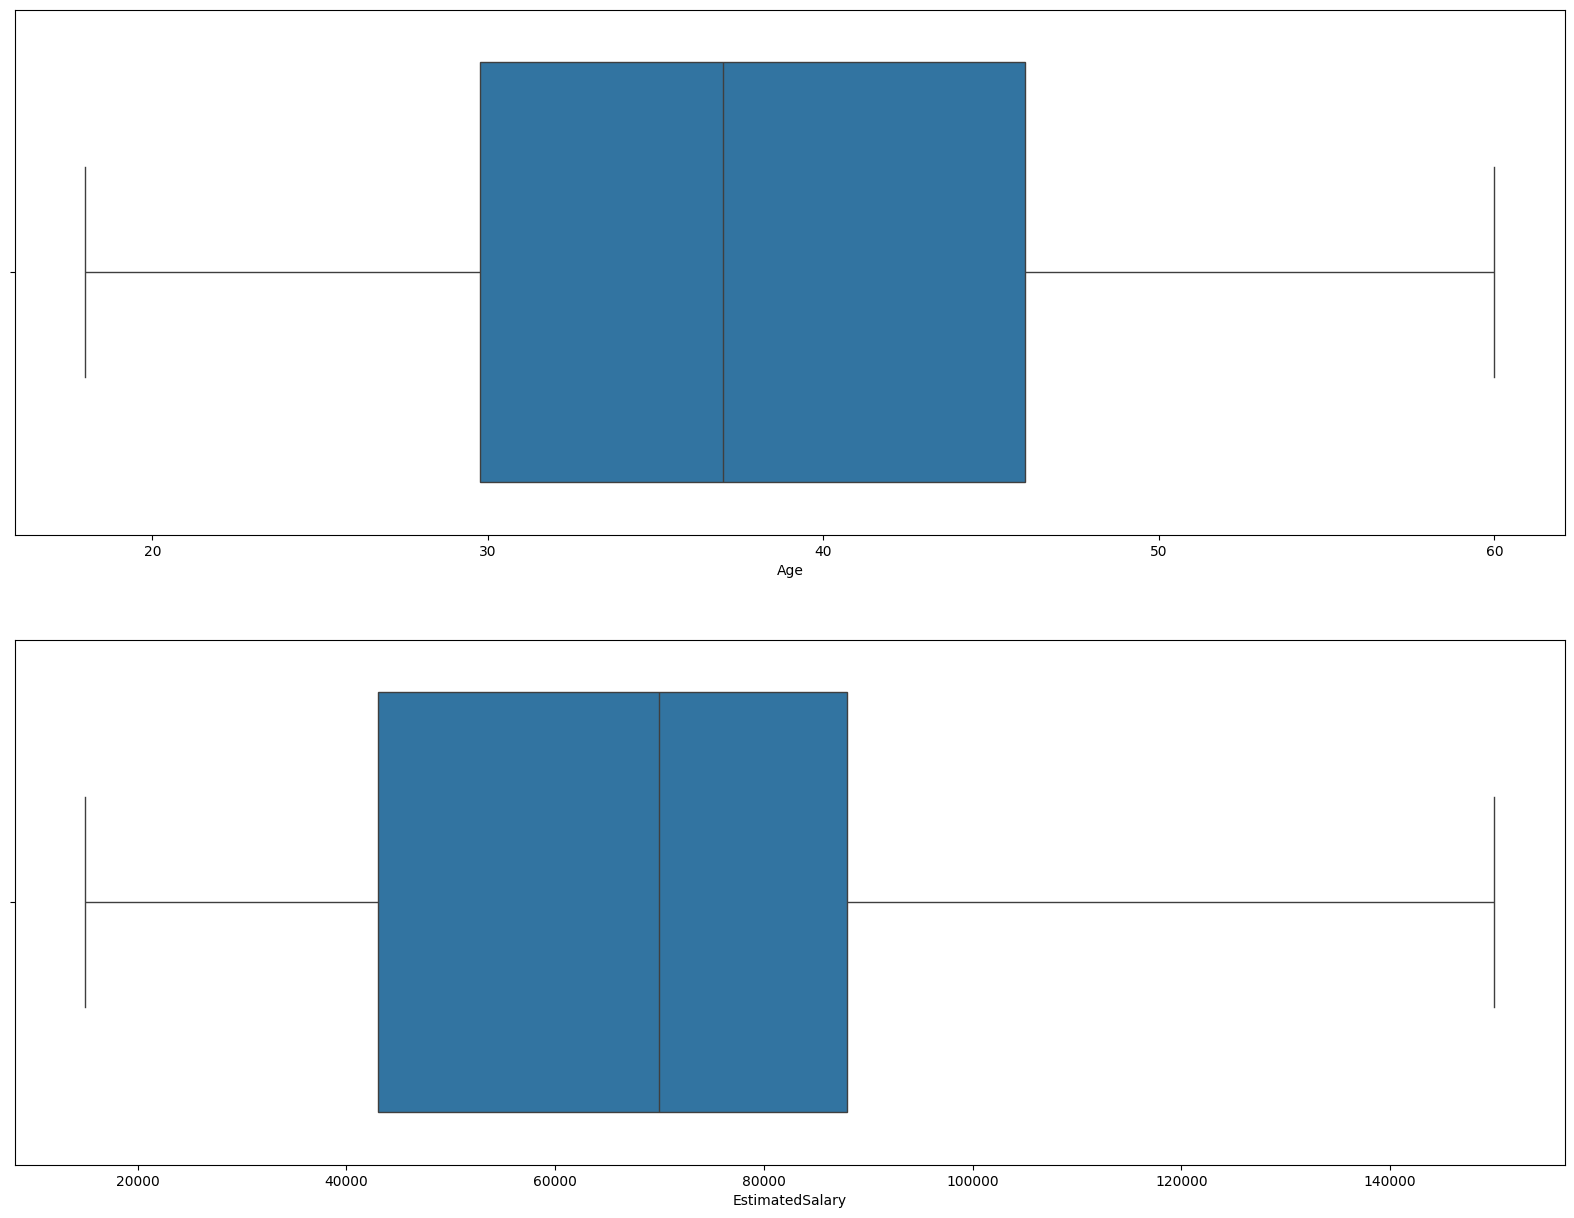

In [42]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.boxplot(data=df,x=df['Age'])
plt.subplot(2,1,2)
sns.boxplot(data=df,x=df['EstimatedSalary'])

In [43]:
df["Gender"].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [45]:
df["Purchased"].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

In [52]:
df['Gender'].replace(['Female','Male'],[0,1],inplace=True)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


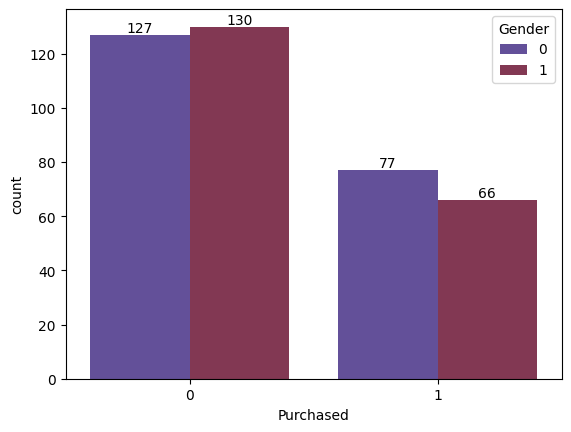

In [55]:
countplot = sns.countplot(x="Purchased", hue="Gender", data=df, palette="twilight")
for i in countplot.containers:
    countplot.bar_label(i)
plt.show()

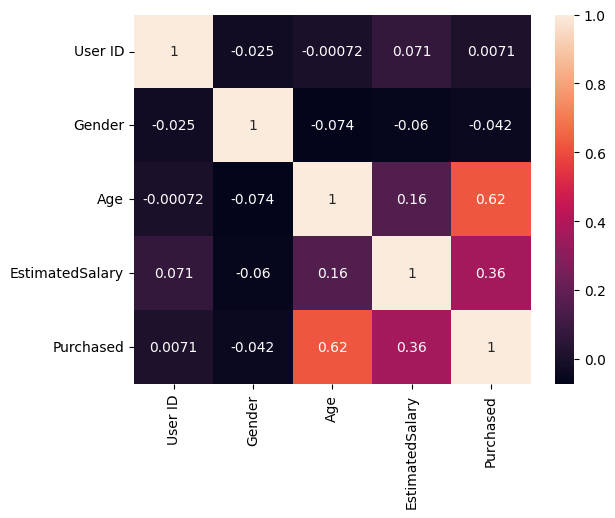

In [56]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [62]:
x = df[["Age","EstimatedSalary"]]
y = df["Purchased"]

In [63]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [65]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [66]:
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [68]:
np.array(y_test)

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1], dtype=int64)

In [71]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[50  2]
 [ 9 19]]


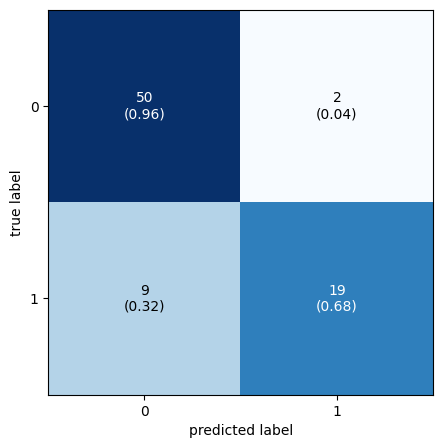

In [73]:
plot_confusion_matrix(conf_mat=cm, figsize=(5,5), show_normed=True)
plt.show()

In [75]:
print("TN:",cm[0][0])
print("FP:",cm[0][1])
print("FN:",cm[1][0])
print("TP:",cm[1][1])

TN: 50
FP: 2
FN: 9
TP: 19


In [77]:
print("Accuracy score: ",accuracy_score(y_test,y_pred))
print("Error rate: ",1-accuracy_score(y_test,y_pred))
print("Precision score: ",precision_score(y_test,y_pred))
print("Recall score: ",recall_score(y_test,y_pred))

Accuracy score:  0.8625
Error rate:  0.13749999999999996
Precision score:  0.9047619047619048
Recall score:  0.6785714285714286


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80

